In [1]:
from sequenzo import *
import pandas as pd

In [2]:
# ------------------------
# Step 1: 读取和准备数据
# ------------------------

df = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv")
time_cols = [f"C{i}" for i in range(1, 11)]  # C1~C10
sequences = extract_sequences(df, time_cols)
states = get_state_space(sequences)

In [4]:
sequences

[['software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software'],
 ['software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software'],
 ['software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software'],
 ['software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software'],
 ['software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software'],
 ['software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software'],
 ['software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'software',
  'support & test',
  'support & test'],
 

In [5]:
states

['data',
 'data & intensive math',
 'hardware',
 'research',
 'software',
 'software & hardware',
 'support & test']

In [3]:
# ------------------------
# Step 2: 构建前缀树
# ------------------------
tree = build_prefix_tree(sequences)

tree

PrefixTree(max_depth=10, total_prefixes=8751)

In [4]:
tree.describe()


[PrefixTree Overview]
[>] Total sequences inserted: 38902
[>] Max depth (time points): 10
[>] Total distinct prefixes: 8751
    Level 1: 7 unique prefixes
    Level 2: 49 unique prefixes
    Level 3: 136 unique prefixes
    Level 4: 291 unique prefixes
    Level 5: 508 unique prefixes
    Level 6: 798 unique prefixes
    Level 7: 1157 unique prefixes
    Level 8: 1519 unique prefixes
    Level 9: 1921 unique prefixes
    Level 10: 2365 unique prefixes


In [4]:
from graphviz import Digraph

def visualize_prefix_tree(tree, max_depth=4, max_children=10, filename="prefix_tree", format="png"):
    """
    Visualize a prefix tree using Graphviz.
    
    Parameters:
        tree: PrefixTree object
        max_depth: int, the maximum depth to visualize
        max_children: int, maximum number of children to display per node
        filename: output file name (without extension)
        format: file format (e.g., 'png', 'pdf', 'svg')
    """
    dot = Digraph(comment="Prefix Tree")
    dot.attr(rankdir='TB', size='10', fontname='Arial', fontsize='10')

    def add_nodes(prefix, node_id, depth):
        if depth > max_depth:
            return
        label = "→".join(prefix) if prefix else "ROOT"
        dot.node(node_id, label)

        children = tree.get_children(prefix)
        # Optionally truncate children for clarity
        child_keys = list(children.keys())[:max_children]

        for i, state in enumerate(child_keys):
            new_prefix = prefix + [state]
            child_id = "_".join(map(str, new_prefix))
            dot.edge(node_id, child_id)
            add_nodes(new_prefix, child_id, depth + 1)

    add_nodes([], "root", 0)
    dot.render(filename=filename, format=format, cleanup=True)
    print(f"[✓] Prefix tree saved as: {filename}.{format}")


In [5]:
tree = build_prefix_tree(sequences)
visualize_prefix_tree(tree, max_depth=4, max_children=8, filename="my_prefix_tree")

[✓] Prefix tree saved as: my_prefix_tree.png


In [6]:
# ------------------------
# Step 3: 计算系统层指标
# ------------------------
T = len(time_cols)
prefix_counts = compute_prefix_count(tree, T)
branching_factors = compute_branching_factor(tree, T)
js_scores = compute_js_divergence(sequences, state_set=states)
composite_score = compute_composite_score(prefix_counts, branching_factors, js_scores)


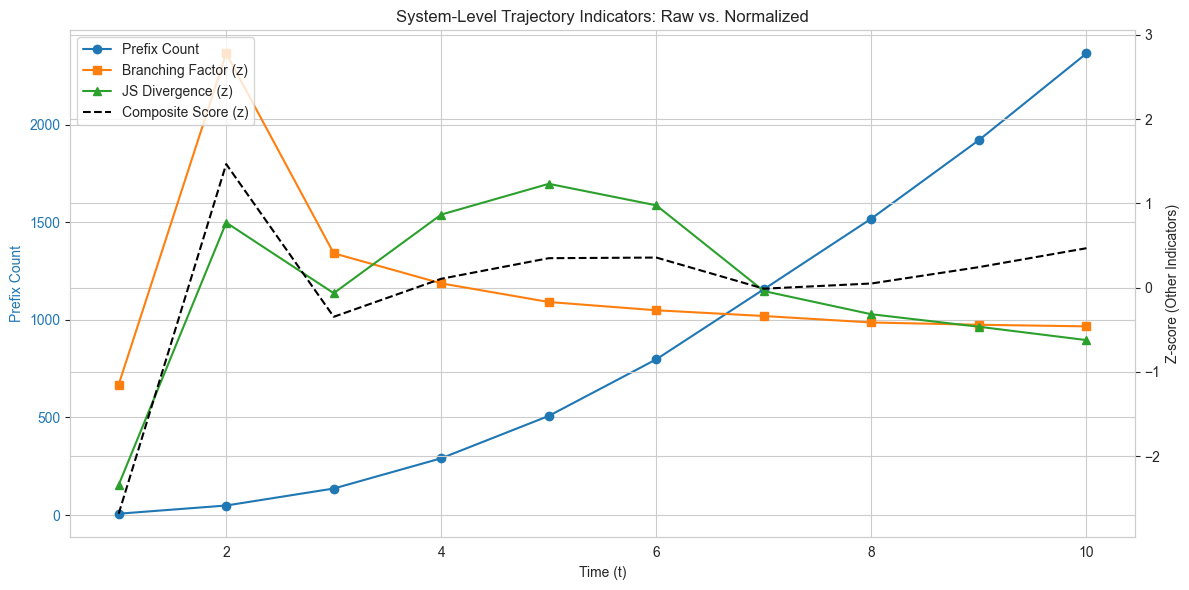

<Figure size 640x480 with 0 Axes>

In [8]:
plot_system_indicators(
    prefix_counts=prefix_counts,
    branching_factors=branching_factors,
    js_divergence=js_scores,              
    composite_score=composite_score,
    save_as="system_indicators"
)

In [4]:
# ------------------------
# Step 4: 计算个体层指标
# ------------------------
divergence = IndividualDivergence(sequences)
df["diverged"] = divergence.compute_diverged()
df["divergence_year"] = divergence.compute_divergence_year()
df["prefix_rarity_score"] = divergence.compute_prefix_rarity_score()
df["path_uniqueness"] = divergence.compute_path_uniqueness()

In [7]:
df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,diverged,divergence_year,prefix_rarity_score,path_uniqueness
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,5.431258,0
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,5.431258,0
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,5.431258,0
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,5.431258,0
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,5.431258,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,5.431258,0
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,5.431258,0
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research,1,2.0,67.430572,3
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software,0,6.0,42.175137,0


In [8]:
df.to_csv('df.csv', index=False)

/var/folders/kk/h5dw00r5357gxylmmb8zl7qw0000gn/T/ipykernel_10308/200685374.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.index, y=vc.values, palette="crest", ax=ax)


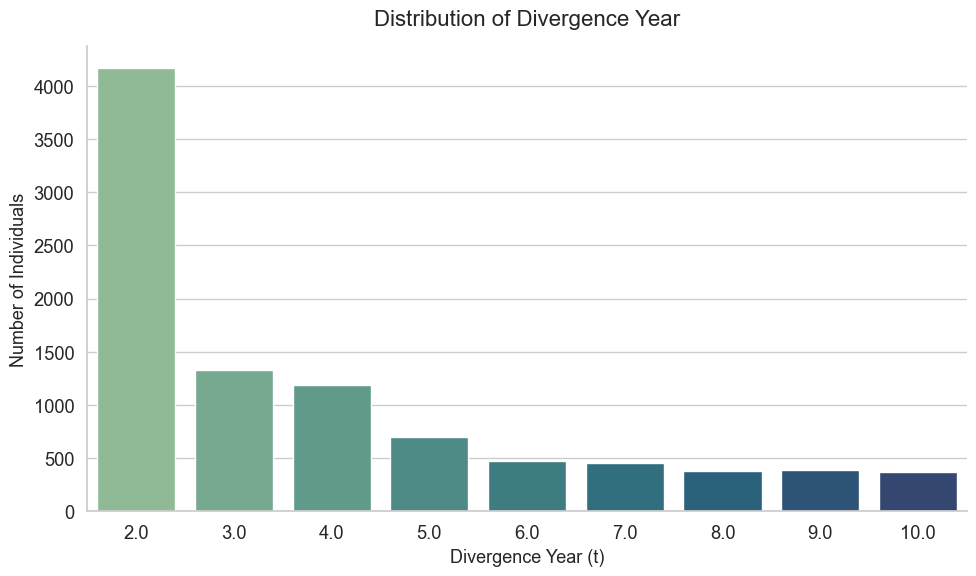

In [6]:
df["divergence_year"] = divergence.compute_divergence_year(min_t=2)

import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格
sns.set(style="whitegrid", font_scale=1.2)

# 创建图形
fig, ax = plt.subplots(figsize=(10, 6))

# 画图
vc = df["divergence_year"].value_counts().sort_index()
sns.barplot(x=vc.index, y=vc.values, palette="crest", ax=ax)

# 标题与标签
ax.set_title("Distribution of Divergence Year", fontsize=16, pad=15)
ax.set_xlabel("Divergence Year (t)", fontsize=13)
ax.set_ylabel("Number of Individuals", fontsize=13)

# 去除顶部和右侧边框
sns.despine()

# 显示或保存
plt.tight_layout()
plt.show()

/var/folders/kk/h5dw00r5357gxylmmb8zl7qw0000gn/T/ipykernel_10308/779405819.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.index, y=vc.values, palette="crest", ax=ax)


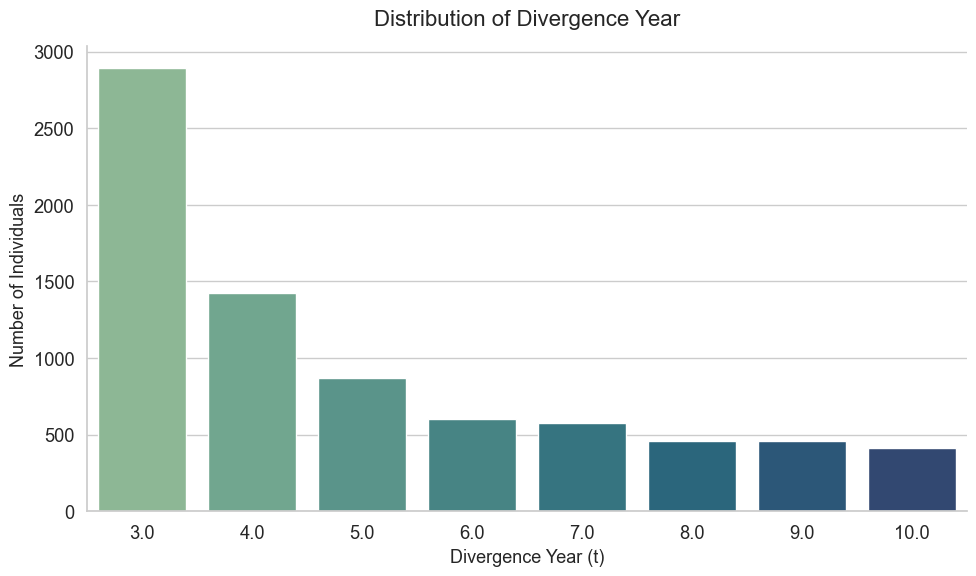

In [5]:


import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格
sns.set(style="whitegrid", font_scale=1.2)

# 创建图形
fig, ax = plt.subplots(figsize=(10, 6))

# 画图
vc = df["divergence_year"].value_counts().sort_index()
sns.barplot(x=vc.index, y=vc.values, palette="crest", ax=ax)

# 标题与标签
ax.set_title("Distribution of Divergence Year ()", fontsize=16, pad=15)
ax.set_xlabel("Divergence Year (t)", fontsize=13)
ax.set_ylabel("Number of Individuals", fontsize=13)

# 去除顶部和右侧边框
sns.despine()

# 显示或保存
plt.tight_layout()
plt.show()

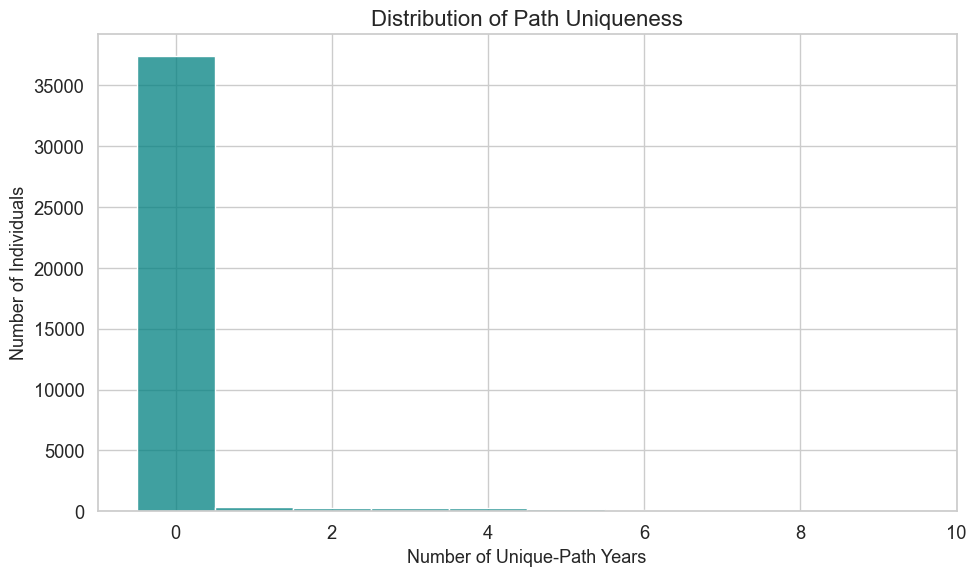

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(df['path_uniqueness'], bins=range(0, max(df['path_uniqueness'])+2), discrete=True, color="teal")

plt.title("Distribution of Path Uniqueness", fontsize=16)
plt.xlabel("Number of Unique-Path Years", fontsize=13)
plt.ylabel("Number of Individuals", fontsize=13)
plt.tight_layout()
plt.show()


In [ ]:
## 分组看unique paths

In [6]:
# 分组标签，比如国家、性别、教育水平、学院等
group_labels = metadata["country"].tolist()  # or metadata["gender"], etc.

# 计算群体内 uniqueness
group_uniqueness = compute_path_uniqueness_by_group(sequences, group_labels)

df_plot = pd.DataFrame({
    "group": group_labels,
    "path_uniqueness": group_uniqueness
})

# 查看每组平均
group_means = df_plot.groupby("group")["path_uniqueness"].mean().sort_values()

# 可视化
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=group_means.index, y=group_means.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Path Uniqueness by Group")
plt.ylabel("Avg. Unique-Path Years")
plt.xlabel("Group")
plt.tight_layout()
plt.show()


456

In [8]:
df["divergence_year"].value_counts(dropna=False).sort_index()

divergence_year
1.0       997
2.0        17
3.0        24
4.0        69
5.0       111
6.0       165
7.0       212
8.0       238
9.0       285
10.0      325
NaN     36459
Name: count, dtype: int64

In [11]:
# 计算每个 gender 群体中有多少比例的人是 diverged（即 diverged == 1 的比例），这回答的是：
# 在男性或女性中，有多少人是 diverged？

df.groupby("gender")["diverged"].mean().sort_values()

gender
female    0.058188
male      0.064109
Name: diverged, dtype: float64

In [10]:
df[df["diverged"] == 1]["gender"].value_counts(normalize=True) * 100

gender
male      79.492427
female    20.507573
Name: proportion, dtype: float64

In [15]:
## 输出每个 gender 中有多少比例的人，在第一年就 diverged

# 条件筛选：diverged 且 divergence_year == 1
mask = (df["diverged"] == 1) & (df["divergence_year"] == 1)

# 分母：每个 gender 总人数
total_per_gender = df["gender"].value_counts()

# 分子：每个 gender 中符合条件的人数
diverged_year1_per_gender = df[mask]["gender"].value_counts()

# 比例计算
proportion = (diverged_year1_per_gender / total_per_gender).fillna(0)

# 显示结果（可选排序）
print(proportion.sort_values(ascending=False))


gender
male      0.026146
female    0.023810
Name: count, dtype: float64


In [52]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

df_path = '/Users/lei/Library/CloudStorage/OneDrive-Nexus365/yuqi_dphil/data/occupational_segregation_paper/cleaned_data'

# 路径 & 加载
divergence_df = pd.read_csv("df.csv")  # 包含 divergence 指标的主表
controls_df = pd.read_csv(f'{df_path}/df_final_encoded_categorical_levels.csv')
controls_df = controls_df.drop(['organization_type', 'num_followers', 'industry'], axis=1)
  # 控制变量表

# 合并
df = divergence_df.merge(controls_df, on="worker_id")

# Merge degrees
df['highest_educational_degree'] = df['highest_educational_degree'].replace(
    {'PhD': 'Advanced Degree', 'Master': 'Advanced Degree'})

# 过滤有效观测
df = df[df["country"].isin(["india", "us"])].copy()
df["gender"] = df["gender"].astype("category")
df["cohort"] = df["cohort"].astype("category")
df["country"] = df["country"].astype("category")

df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,...,prefix_rarity_score,path_uniqueness,Unnamed: 0,highest_educational_degree,whether_bachelor_university_prestigious,internationalization,company_size,highest_seniority_level,work_years,simplified_company_size
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,...,5.431258,0,546965,Bachelor,False,Multinational,"1,001-5,000 employees",Senior,15.250,Large (500+ employees)
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,...,5.431258,0,80989,Bachelor,False,Local,"5,001-10,000 employees",Normal,11.500,Large (500+ employees)
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,...,5.431258,0,169758,Bachelor,False,International,11-50 employees,Normal,18.417,Small (11-50 employees)
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,...,5.431258,0,112314,Bachelor,False,Multinational,"5,001-10,000 employees",Senior,11.917,Large (500+ employees)
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,...,5.431258,0,132403,Bachelor,False,Multinational,"1,001-5,000 employees",Senior,13.083,Large (500+ employees)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32626,michelle-elder,female,us,21-30 total work years,software,software,software,software,software,software,...,26.529613,0,505016,Bachelor,True,Local,201-500 employees,Senior,25.000,Medium (51-500 employees)
32627,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,...,5.431258,0,27311,Advanced Degree,False,Local,"10,001+ employees",Normal,10.000,Large (500+ employees)
32628,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,...,5.431258,0,241774,Bachelor,False,Local,"10,001+ employees",Normal,26.750,Large (500+ employees)
32629,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,...,67.430572,3,527445,Advanced Degree,False,Local,"1,001-5,000 employees",Senior,26.000,Large (500+ employees)


In [53]:
df['highest_seniority_level'].value_counts()

highest_seniority_level
Senior              12236
Normal              11702
Leader               7712
Chief or founder      644
Assistant/Junior      337
Name: count, dtype: int64

In [36]:
def run_country_models(df, country, outcomes):
    models = {}
    df_sub = df[df["country"] == country].copy()

    for outcome in outcomes:
        try:
            # 自动选择模型类型
            is_binary = df_sub[outcome].dropna().isin([0, 1]).all()
            model_fn = smf.logit if is_binary else smf.ols

            formula = f"""{outcome} ~ C(gender) + work_years 
                          + C(gender) * work_years 
                          + C(gender) * C(highest_educational_degree, Treatment(reference='Bachelor')) 
                          + C(gender) * C(whether_bachelor_university_prestigious, Treatment(reference=False)) 
                          + C(highest_educational_degree, Treatment(reference='Bachelor')) 
                          + C(whether_bachelor_university_prestigious, Treatment(reference=False)) 
                          + C(internationalization, Treatment(reference='Local')) 
                          + C(simplified_company_size, Treatment(reference='Micro (0-10 employees)')) 
                          + C(highest_seniority_level, Treatment(reference='Assistant/Junior'))"""

            model = model_fn(formula, data=df_sub).fit()
            print(f"\n📌 [{country.upper()}] Fitted {outcome} model.")
            models[outcome] = model
        except Exception as e:
            print(f"[{country.upper()}] ❌ Error fitting {outcome}: {e}")
    return models


In [37]:
outcomes = ["diverged", "divergence_year", "prefix_rarity_score", "path_uniqueness"]

models_india = run_country_models(df, "india", outcomes)
models_us = run_country_models(df, "us", outcomes)


Optimization terminated successfully.
         Current function value: 0.220103
         Iterations 8

📌 [INDIA] Fitted diverged model.

📌 [INDIA] Fitted divergence_year model.

📌 [INDIA] Fitted prefix_rarity_score model.

📌 [INDIA] Fitted path_uniqueness model.
Optimization terminated successfully.
         Current function value: 0.195960
         Iterations 8

📌 [US] Fitted diverged model.

📌 [US] Fitted divergence_year model.

📌 [US] Fitted prefix_rarity_score model.

📌 [US] Fitted path_uniqueness model.


In [38]:
def extract_coef_table(model_dict, country):
    rows = []
    for outcome, model in model_dict.items():
        for term, coef in model.params.items():
            if "gender" in term:
                rows.append({
                    "Outcome": outcome,
                    "Term": term,
                    "Coef": coef,
                    "Country": country
                })
    return pd.DataFrame(rows)

# 合并两个国家的性别系数
coef_df = pd.concat([
    extract_coef_table(models_india, "India"),
    extract_coef_table(models_us, "US")
])


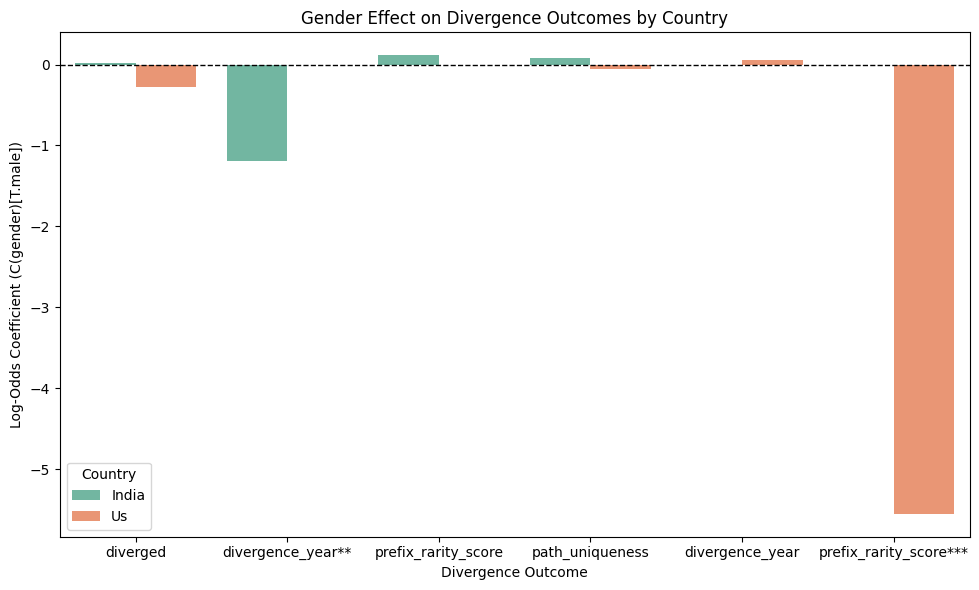

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def extract_gender_effect(models_dict, country_name):
    """
    从模型中提取 C(gender)[T.male] 的系数和 p 值
    """
    rows = []
    for outcome, model in models_dict.items():
        try:
            coef = model.params["C(gender)[T.male]"]
            pval = model.pvalues["C(gender)[T.male]"]
            rows.append({
                "Outcome": outcome,
                "Country": country_name.capitalize(),
                "Coef": coef,
                "Pval": pval
            })
        except KeyError:
            print(f"⚠️ Missing gender effect in {outcome} for {country_name}")
    return pd.DataFrame(rows)

# 提取两国模型中的性别效应
india_df = extract_gender_effect(models_india, "india")
us_df = extract_gender_effect(models_us, "us")

# 合并
coef_df = pd.concat([india_df, us_df], ignore_index=True)

# 添加显著性标记
def add_stars(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""

coef_df["stars"] = coef_df["Pval"].apply(add_stars)
coef_df["OutcomeLabel"] = coef_df["Outcome"] + coef_df["stars"]

# 绘图
plt.figure(figsize=(10, 6))
sns.barplot(
    data=coef_df,
    x="OutcomeLabel", y="Coef", hue="Country",
    palette="Set2"
)
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Gender Effect on Divergence Outcomes by Country")
plt.ylabel("Log-Odds Coefficient (C(gender)[T.male])")
plt.xlabel("Divergence Outcome")
plt.tight_layout()
plt.show()



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 2443
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']


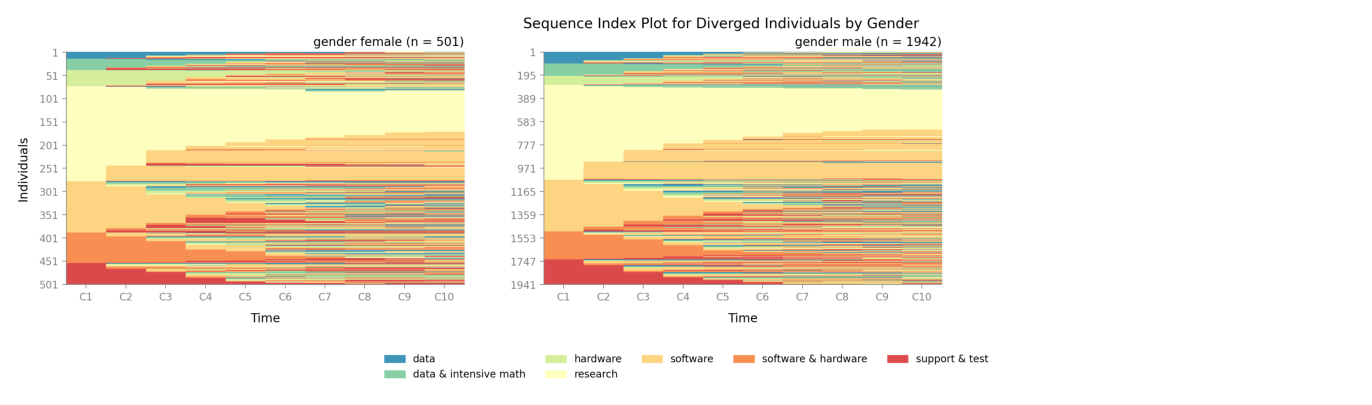

In [42]:
import pandas as pd
from sequenzo import SequenceData
from sequenzo.visualization import plot_sequence_index

# 1. 加载包含 divergence 指标的数据
df = pd.read_csv("df.csv")

# 2. 筛选出偏离路径的个体（例如 diverged == 1）
df_diverged = df[df["diverged"] == 1].copy()

# 3. 只保留序列列和元数据
seq_cols = [f"C{i}" for i in range(1, 11)]
meta_cols = ["worker_id", "gender"]
df_seq = df_diverged[meta_cols + seq_cols].copy()

# 4. 创建 SequenceData 对象
states = sorted(pd.unique(df_seq[seq_cols].values.ravel()))  # 提取所有状态值
seq_obj = SequenceData(
    data=df_seq,
    id_col="worker_id",
    time=seq_cols,
    states=states,
    time_type="year"
)

# 5. 创建分性别的分组表
group_df = df_seq[["worker_id", "gender"]].copy().rename(columns={"worker_id": "Entity ID"})

# 6. 绘制序列 index 图
plot_sequence_index(
    seqdata=seq_obj,
    id_group_df=group_df,
    categories="gender",
    title="Sequence Index Plot for Diverged Individuals by Gender",
    xlabel="Time",
    ylabel="Individuals",
    figsize=(8, 4),
    layout="column"
)



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 38902
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']


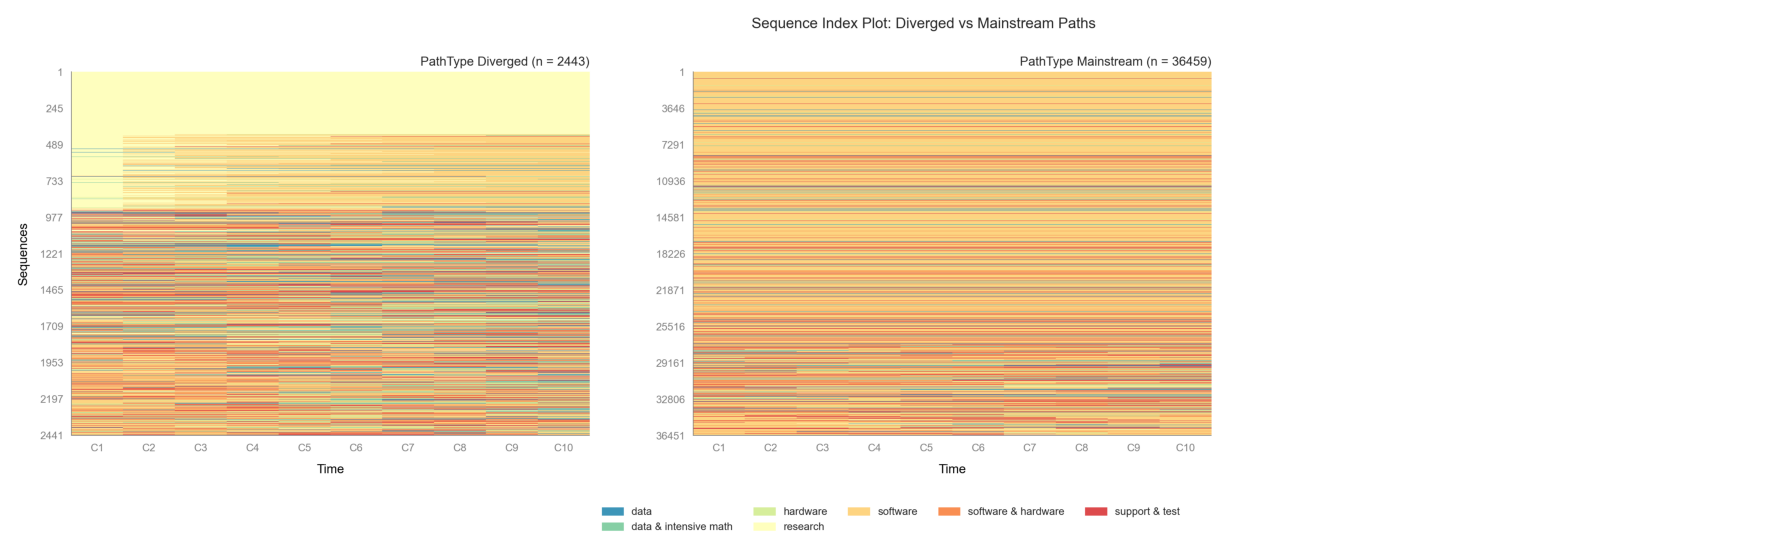

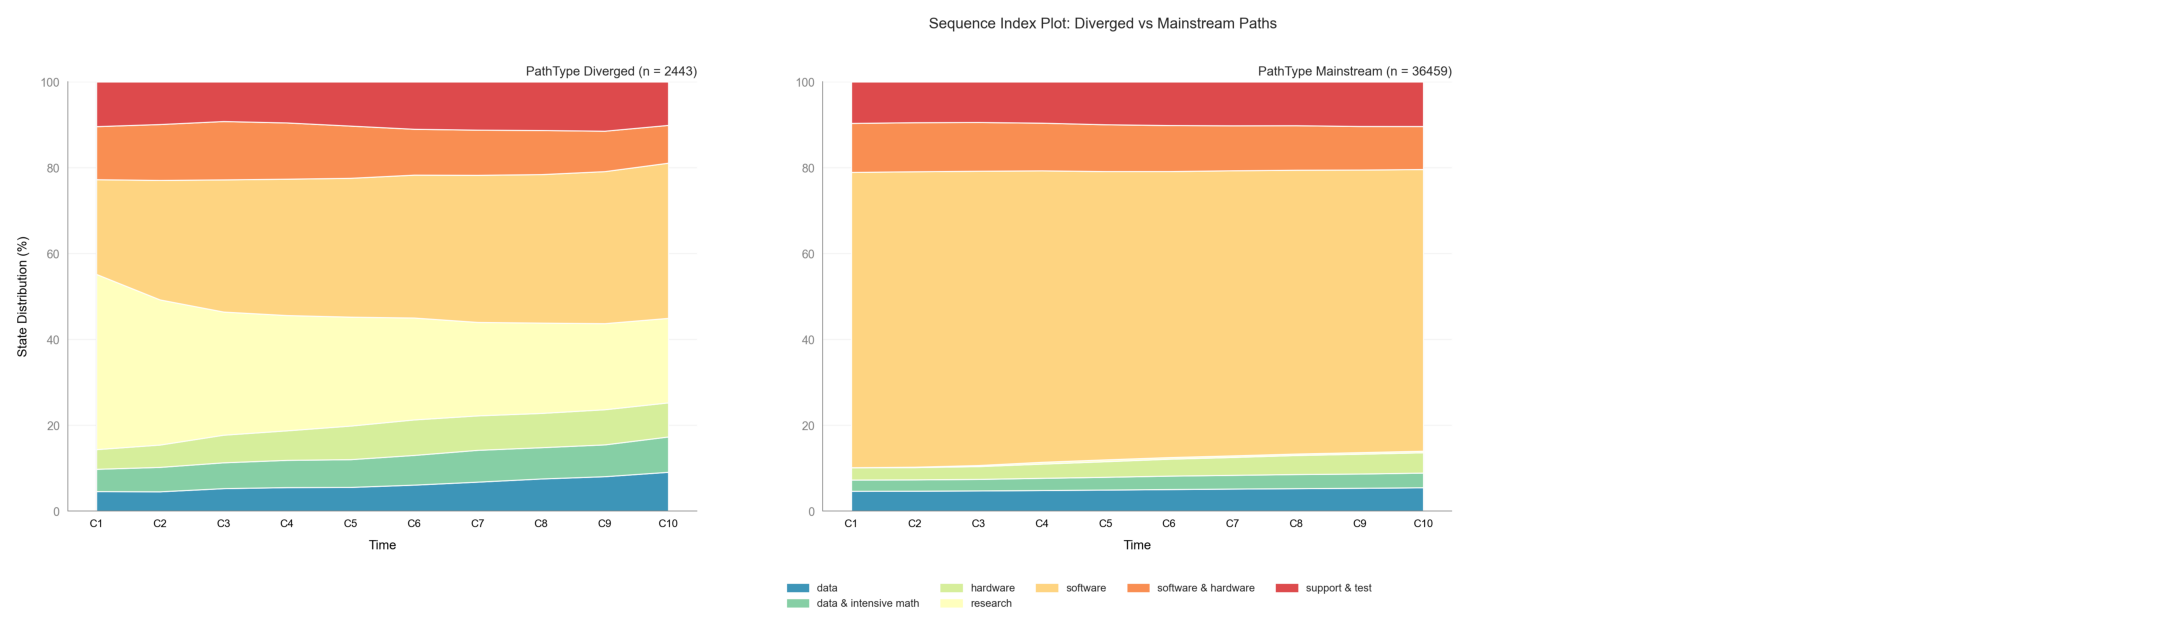

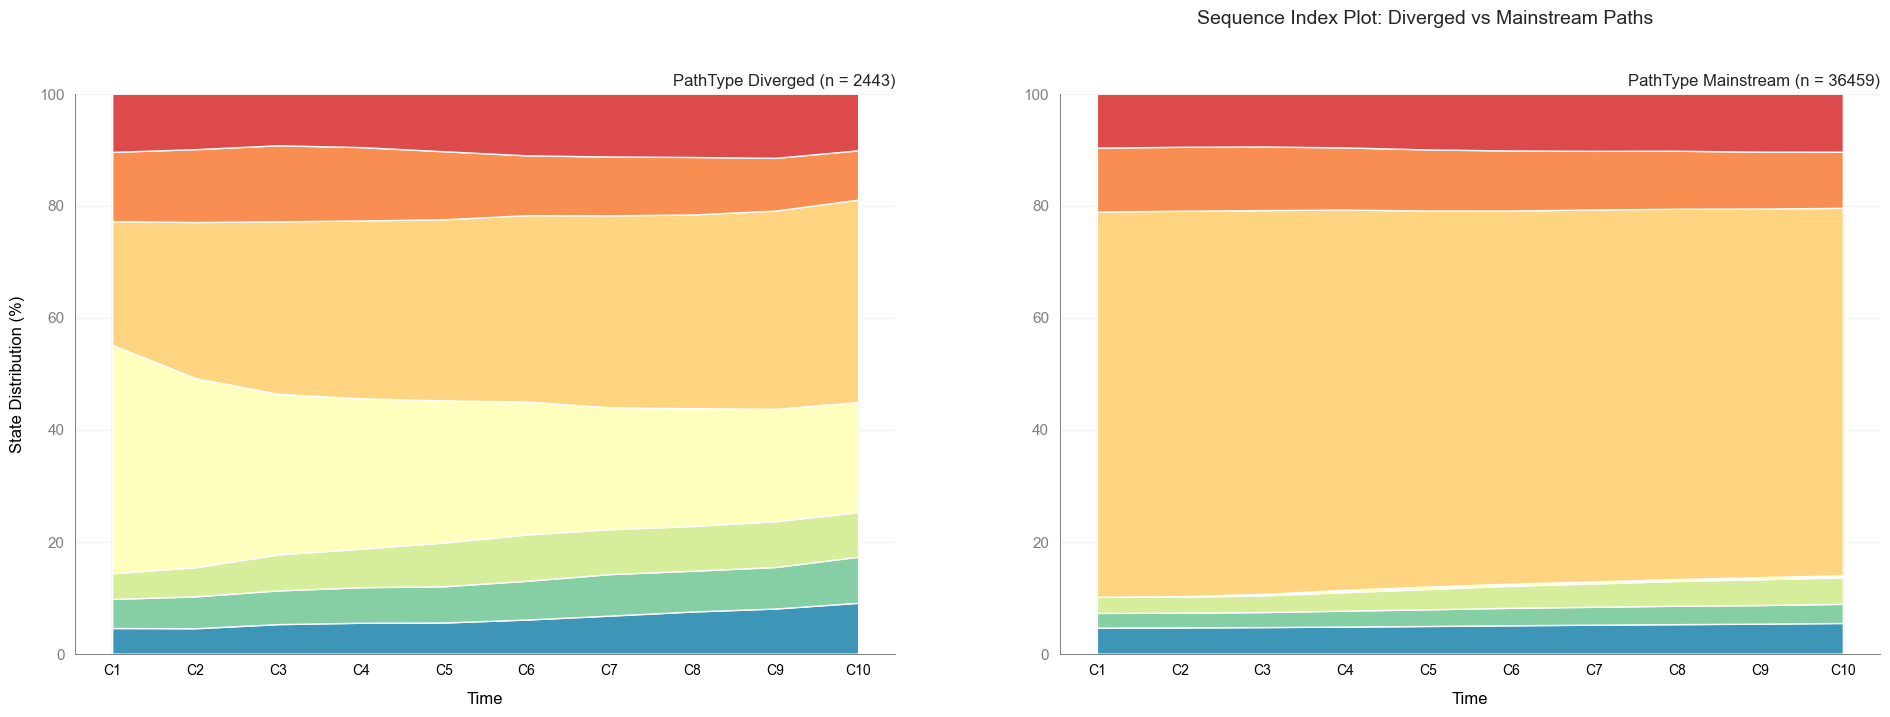

In [50]:
from sequenzo import SequenceData
from sequenzo.visualization import plot_sequence_index

# ===== Step 1: 筛选偏离与主流个体 =====
diverged_df = df[df["diverged"] == 1].copy()
mainstream_df = df[df["diverged"] == 0].copy()

# 合并成总 df
compare_df = pd.concat([diverged_df, mainstream_df])
compare_df["PathType"] = compare_df["diverged"].map({1: "Diverged", 0: "Mainstream"})

# ===== Step 2: 构建 SequenceData 对象 =====
time_cols = [f"C{i}" for i in range(1, 11)]
state_list = sorted(compare_df[time_cols].stack().dropna().unique().tolist())  # e.g. ['data', 'hardware', ...]

seq = SequenceData(
    data=compare_df,
    id_col="worker_id",
    time=time_cols,
    states=state_list,
    time_type="year"
)

# ===== Step 3: 构建分组 df 用于 index plot =====
group_df = compare_df[["worker_id", "PathType"]].copy()

# ===== Step 4: 绘图 =====
plot_sequence_index(
    seqdata=seq,
    id_group_df=group_df,
    categories="PathType",
    title="Sequence Index Plot: Diverged vs Mainstream Paths",
    sort_by="transition_count",  # 可选排序方式
    save_as="diverged_vs_mainstream_index_plot.png"
)

plot_state_distribution(
    seqdata=seq,
    id_group_df=group_df,
    categories="PathType",
    title="Sequence Index Plot: Diverged vs Mainstream Paths",
    # sort_by="transition_count",  # 可选排序方式
    save_as="diverged_vs_mainstream_state_distribution_plot.png"
)


In [45]:
# 很快，OMspell sm=TRATE 51秒做完, 没必要做 trate，因为转换的人太少了，所以还不如直接 sm
# 不用 sm=TRATE 的话 41s 能跑完

detailed_distance_matrix = get_distance_matrix(seqdata=seq_obj, 
                                               method="OMspell", 
                                               sm="CONSTANT", 
                                               indel=1, 
                                               expcost=1)

detailed_distance_matrix

# Why does it only show an 11*11 matrix as an output?

[>] Processing 2443 sequences with 7 unique states.
  - Creating 8x8 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 1568 unique spell sequences.
[>] Sequence spell length: min/max = 1 / 6.

[>] Starting Optimal Matching with spell(OMspell)...


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/numpy/core/numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


[>] Computing all pairwise distances...
[>] Computed Successfully.


,mohd-akber-khan-9a978052,vijayrout,pulkit-kinra-91629b131,iyappan-subramanian-0381441a,devesh-p-970aa720,jayakrishnagolla,arun-kumar-manivannan-361a5693,sanjeev-verma-556b2136,sridhar-goud-palusam,jayeshpawar92,...,stephaniebian,alekslyamtsev,sowjanya-tatineni-40158692,krishnaveni-p-b2222928,lottie-price-0a718257,sandra-kleiner-bbb8247a,aukargol,layamrudhaa-venkatesan-51036b29,yelena-wu-a2a2332a,sariandoni
mohd-akber-khan-9a978052,0.0,12.0,12.0,14.0,12.0,16.0,4.0,10.0,16.0,12.0,...,16.0,16.0,16.0,10.0,20.0,20.0,16.0,16.0,16.0,14.0
vijayrout,12.0,0.0,10.0,14.0,12.0,8.0,10.0,12.0,12.0,12.0,...,12.0,12.0,10.0,8.0,20.0,20.0,12.0,12.0,12.0,12.0
pulkit-kinra-91629b131,12.0,10.0,0.0,10.0,10.0,16.0,12.0,10.0,16.0,16.0,...,16.0,16.0,14.0,12.0,20.0,20.0,16.0,16.0,16.0,16.0
iyappan-subramanian-0381441a,14.0,14.0,10.0,0.0,14.0,18.0,14.0,8.0,18.0,16.0,...,20.0,20.0,16.0,14.0,20.0,20.0,20.0,20.0,20.0,18.0
devesh-p-970aa720,12.0,12.0,10.0,14.0,0.0,18.0,14.0,10.0,18.0,14.0,...,18.0,18.0,16.0,6.0,20.0,20.0,18.0,18.0,18.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sandra-kleiner-bbb8247a,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,18.0,...,18.0,18.0,20.0,20.0,0.0,0.0,12.0,16.0,16.0,14.0
aukargol,16.0,12.0,16.0,20.0,18.0,8.0,20.0,14.0,10.0,6.0,...,6.0,6.0,12.0,14.0,12.0,12.0,0.0,4.0,4.0,8.0
layamrudhaa-venkatesan-51036b29,16.0,12.0,16.0,20.0,18.0,8.0,20.0,14.0,10.0,4.0,...,2.0,2.0,12.0,14.0,16.0,16.0,4.0,0.0,0.0,8.0
yelena-wu-a2a2332a,16.0,12.0,16.0,20.0,18.0,8.0,20.0,14.0,10.0,4.0,...,2.0,2.0,12.0,14.0,16.0,16.0,4.0,0.0,0.0,8.0


[>] Converting DataFrame to NumPy array...


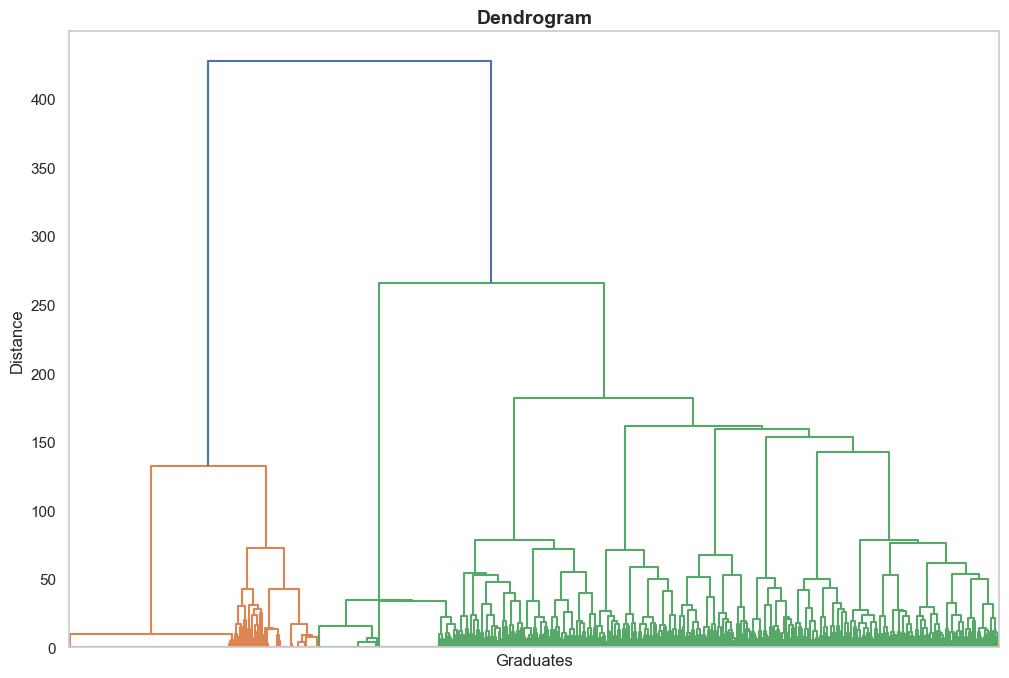

<Figure size 640x480 with 0 Axes>

In [46]:

import sys

# 设置更高的递归深度，比如 20000
sys.setrecursionlimit(25000)

detailed_cluster = Cluster(detailed_distance_matrix, df_seq.worker_id, clustering_method='ward')

detailed_cluster.plot_dendrogram(xlabel="Graduates", ylabel="Distance")


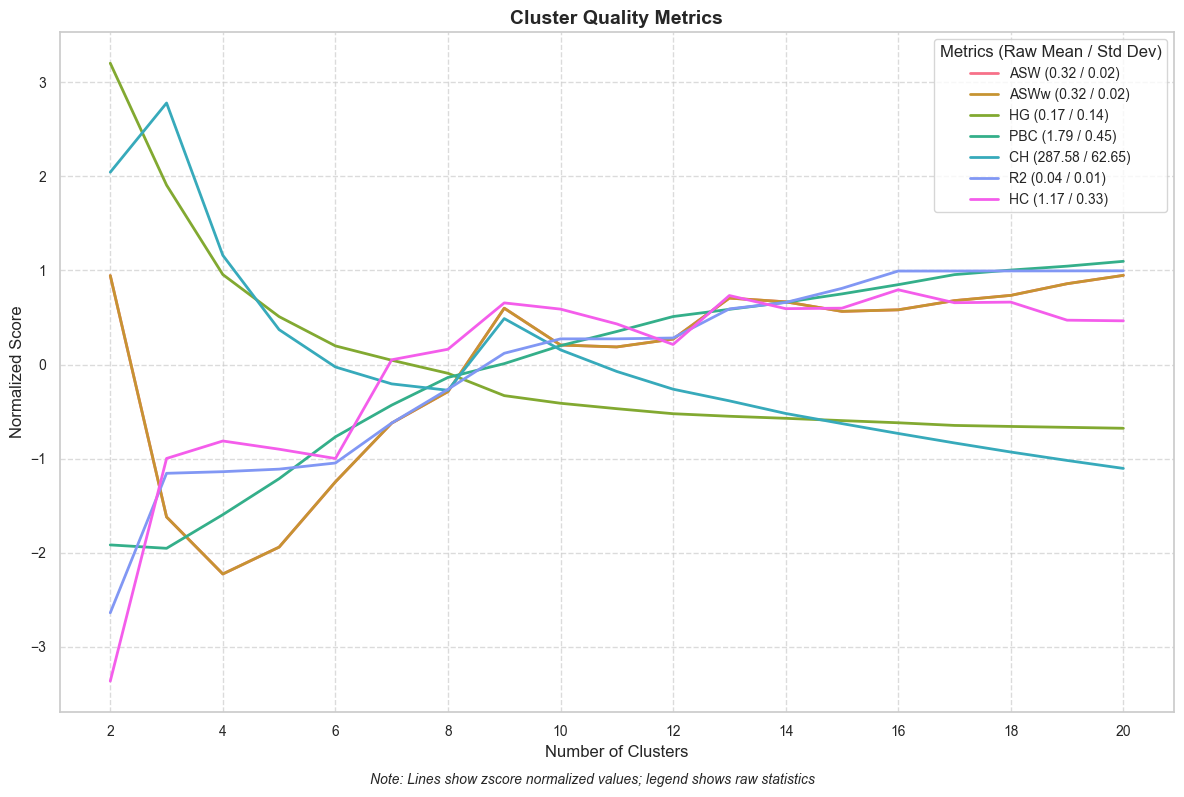

  Metric  Opt. Clusters  Opt. Value  Z-Score Norm.  Min-Max Norm.
0    ASW             20    0.947161       0.947161            1.0
1   ASWw             20    0.947161       0.947161            1.0
2     HG              2    3.201099       3.201099            1.0
3    PBC             20    1.096407       1.096407            1.0
4     CH              3    2.778472       2.778472            1.0
5     R2             20    0.995502       0.995502            1.0
6     HC             16    0.793985       0.793985            1.0


<Figure size 640x480 with 0 Axes>

In [47]:
# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(detailed_cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_combined_scores(norm='zscore', save_as='combined_scores')
summary_table = cluster_quality.get_metrics_table()
print(summary_table)

                            Entity ID  Cluster ID
0            mohd-akber-khan-9a978052           6
1                           vijayrout           5
2              pulkit-kinra-91629b131           3
3        iyappan-subramanian-0381441a           3
4                   devesh-p-970aa720           4
...                               ...         ...
2438          sandra-kleiner-bbb8247a           1
2439                         aukargol           1
2440  layamrudhaa-venkatesan-51036b29           2
2441               yelena-wu-a2a2332a           2
2442                       sariandoni           2

[2443 rows x 2 columns]
   Cluster  Count  Percentage
0        1    655       26.81
1        2    368       15.06
2        3    363       14.86
3        4    214        8.76
4        5    193        7.90
5        6    650       26.61


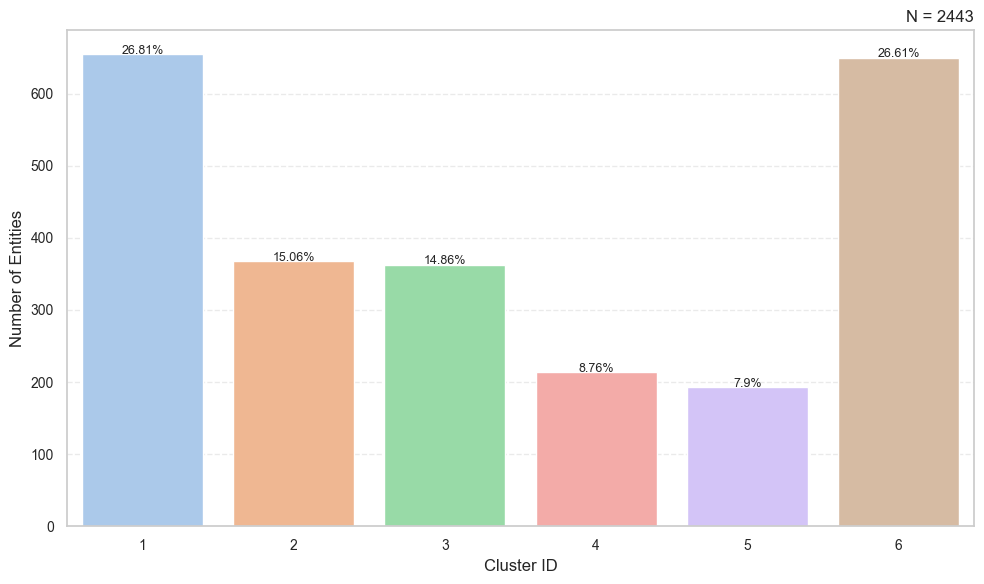

<Figure size 640x480 with 0 Axes>

In [48]:
cluster_results = ClusterResults(detailed_cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=6)
print(membership_table)
membership_table.to_csv('detailed_sequences_cluster_6_membership_table.csv', index=False)

distribution = cluster_results.get_cluster_distribution(num_clusters=6)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=6, save_as="distribution.png", title=None)

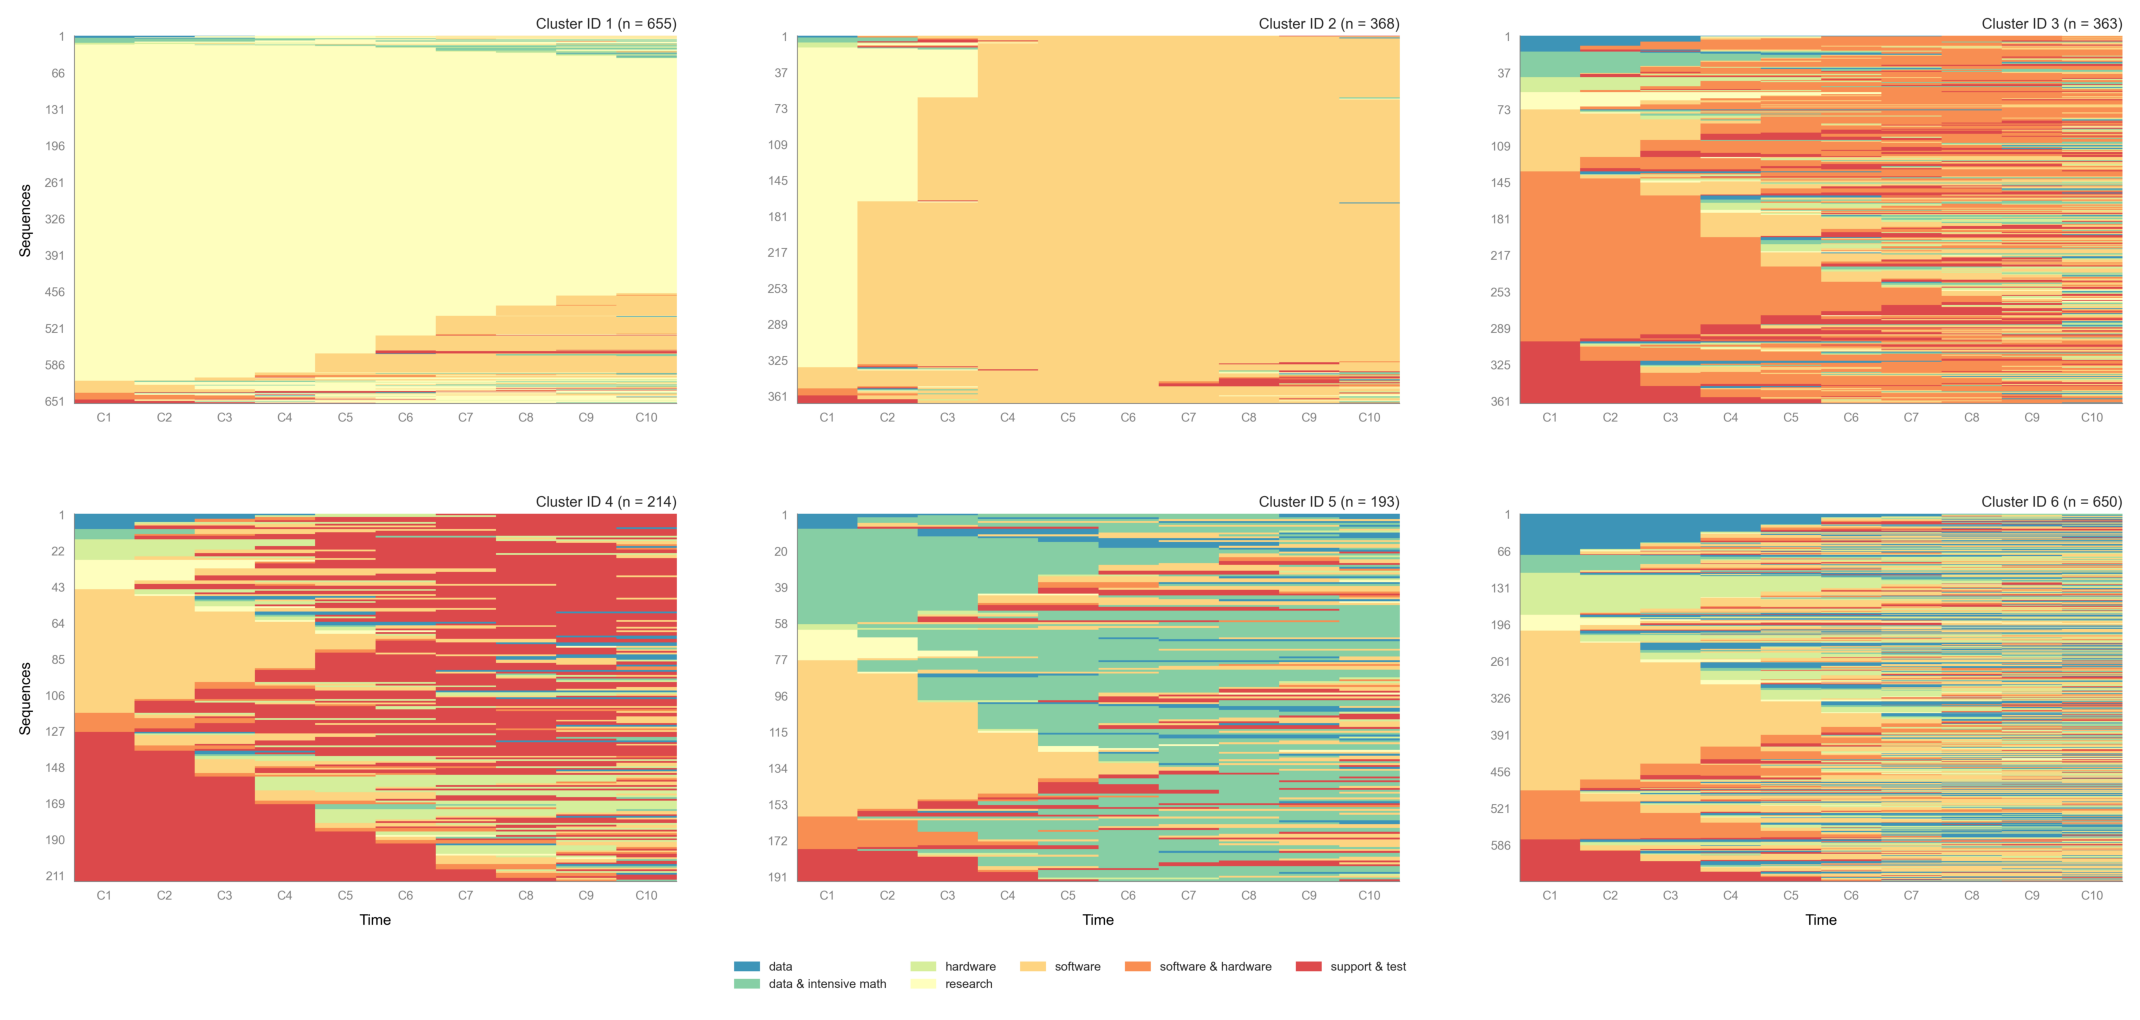

In [49]:
plot_sequence_index(seqdata=seq_obj,
                    id_group_df=membership_table,
                    categories='Cluster ID',
                    save_as='detailed_sequences_cluster_index_plot_cluster_6',
                    dpi=300)

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,diverged,divergence_year,prefix_rarity_score,path_uniqueness
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,5.431258,0
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,5.431258,0
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,5.431258,0
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,5.431258,0
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,5.431258,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,5.431258,0
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,5.431258,0
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research,1,2.0,67.430572,3
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software,0,6.0,42.175137,0


## Whether divergence leads to more success in careers

In [62]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

df_path = '/Users/lei/Library/CloudStorage/OneDrive-Nexus365/yuqi_dphil/data/occupational_segregation_paper/cleaned_data'

# 路径 & 加载
divergence_df = pd.read_csv("df.csv")  # 包含 divergence 指标的主表
controls_df = pd.read_csv(f'{df_path}/df_final_encoded_categorical_levels.csv')
controls_df = controls_df.drop(['organization_type', 'num_followers', 'industry'], axis=1)
  # 控制变量表

# 合并
df = divergence_df.merge(controls_df, on="worker_id")

# Merge degrees
df['highest_educational_degree'] = df['highest_educational_degree'].replace(
    {'PhD': 'Advanced Degree', 'Master': 'Advanced Degree'})

# 过滤有效观测
df = df[df["country"].isin(["india", "us"])].copy()
df["gender"] = df["gender"].astype("category")
df["cohort"] = df["cohort"].astype("category")
df["country"] = df["country"].astype("category")

df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,...,prefix_rarity_score,path_uniqueness,Unnamed: 0,highest_educational_degree,whether_bachelor_university_prestigious,internationalization,company_size,highest_seniority_level,work_years,simplified_company_size
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,...,5.431258,0,546965,Bachelor,False,Multinational,"1,001-5,000 employees",Senior,15.250,Large (500+ employees)
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,...,5.431258,0,80989,Bachelor,False,Local,"5,001-10,000 employees",Normal,11.500,Large (500+ employees)
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,...,5.431258,0,169758,Bachelor,False,International,11-50 employees,Normal,18.417,Small (11-50 employees)
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,...,5.431258,0,112314,Bachelor,False,Multinational,"5,001-10,000 employees",Senior,11.917,Large (500+ employees)
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,...,5.431258,0,132403,Bachelor,False,Multinational,"1,001-5,000 employees",Senior,13.083,Large (500+ employees)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32626,michelle-elder,female,us,21-30 total work years,software,software,software,software,software,software,...,26.529613,0,505016,Bachelor,True,Local,201-500 employees,Senior,25.000,Medium (51-500 employees)
32627,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,...,5.431258,0,27311,Advanced Degree,False,Local,"10,001+ employees",Normal,10.000,Large (500+ employees)
32628,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,...,5.431258,0,241774,Bachelor,False,Local,"10,001+ employees",Normal,26.750,Large (500+ employees)
32629,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,...,67.430572,3,527445,Advanced Degree,False,Local,"1,001-5,000 employees",Senior,26.000,Large (500+ employees)


In [66]:
df.to_csv('combined_df.csv', index=False)

In [68]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
import patsy

# 设置等级顺序
seniority_order = ["Assistant/Junior", "Normal", "Senior", "Leader", "Chief or founder"]
df["highest_seniority_level"] = pd.Categorical(
    df["highest_seniority_level"], categories=seniority_order, ordered=True
)

# 删除缺失
df_clean = df.dropna(subset=["highest_seniority_level", "diverged", "gender", "work_years",
                             "highest_educational_degree", "whether_bachelor_university_prestigious",
                             "internationalization", "simplified_company_size"])

# 构建设计矩阵
formula = """diverged 
             + C(gender) 
             + work_years 
             + C(gender) * work_years 
             + C(gender) * C(highest_educational_degree, Treatment(reference='Bachelor')) 
             + C(gender) * C(whether_bachelor_university_prestigious, Treatment(reference=False)) 
             + C(highest_educational_degree, Treatment(reference='Bachelor')) 
             + C(whether_bachelor_university_prestigious, Treatment(reference=False)) 
             + C(internationalization, Treatment(reference='Local')) 
             + C(simplified_company_size, Treatment(reference='Micro (0-10 employees)'))"""

X = patsy.dmatrix(formula, data=df_clean, return_type="dataframe")

# 手动去除 Intercept 列（如果存在）
X = X.loc[:, ~X.columns.str.contains('Intercept')]

# 拟合模型
y = df_clean["highest_seniority_level"]
model = OrderedModel(endog=y, exog=X, distr='logit')
result = model.fit(method='bfgs')
print(result.summary())


Optimization terminated successfully.
         Current function value: 1.194591
         Iterations: 79
         Function evaluations: 81
         Gradient evaluations: 81
                                OrderedModel Results                               
Dep. Variable:     highest_seniority_level   Log-Likelihood:                -38981.
Model:                        OrderedModel   AIC:                         7.800e+04
Method:                 Maximum Likelihood   BIC:                         7.814e+04
Date:                     Fri, 02 May 2025                                         
Time:                             14:59:07                                         
No. Observations:                    32631                                         
Df Residuals:                        32614                                         
Df Model:                               13                                         
                                                                        

In [75]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
import patsy

# 保证顺序
seniority_order = ["Assistant/Junior", "Normal", "Senior", "Leader", "Chief or founder"]
df["highest_seniority_level"] = pd.Categorical(
    df["highest_seniority_level"], categories=seniority_order, ordered=True
)

# 删除缺失
df_clean = df.dropna(subset=[
    "highest_seniority_level", "diverged", "gender", "work_years",
    "highest_educational_degree", "whether_bachelor_university_prestigious",
    "internationalization", "simplified_company_size", "country"
])

# 模型公式（不变）
formula = """diverged 
             + C(gender) 
             + work_years 
             + C(gender) * work_years 
             + C(gender) * C(highest_educational_degree, Treatment(reference='Bachelor')) 
             + C(gender) * C(whether_bachelor_university_prestigious, Treatment(reference=False)) 
             + C(highest_educational_degree, Treatment(reference='Bachelor')) 
             + C(whether_bachelor_university_prestigious, Treatment(reference=False)) 
             + C(internationalization, Treatment(reference='Local')) 
             + C(simplified_company_size, Treatment(reference='Micro (0-10 employees)'))"""

# 跑模型
results_by_country = {}

for country in ['india', 'us']:
    print(f"\n========================")
    print(f"📌 Ordered Logit for {country.upper()}")
    print(f"========================")

    df_country = df_clean[df_clean["country"] == country].copy()
    y = df_country["highest_seniority_level"]

    # 使用 Patsy 去除 Intercept（并强制检查列）
    X = patsy.dmatrix(formula, data=df_country, return_type="dataframe")
    if "Intercept" in X.columns:
        X = X.drop(columns="Intercept")

    model = OrderedModel(endog=y, exog=X, distr='logit')
    result = model.fit(method='bfgs', disp=False)
    print(result.summary())

    results_by_country[country] = result



📌 Ordered Logit for INDIA
                                OrderedModel Results                               
Dep. Variable:     highest_seniority_level   Log-Likelihood:                -15145.
Model:                        OrderedModel   AIC:                         3.032e+04
Method:                 Maximum Likelihood   BIC:                         3.045e+04
Date:                     Fri, 02 May 2025                                         
Time:                             15:05:58                                         
No. Observations:                    12784                                         
Df Residuals:                        12767                                         
Df Model:                               13                                         
                                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

In [10]:
detailed_df = pd.read_csv('/Users/lei/Library/CloudStorage/OneDrive-Nexus365/sequenzo/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv')

# Cleaned the columns that contain time

# Sample DataFrame with column names
detailed_df.columns  # ['worker_id', 'C1', 'C2', ..., 'C10']

# Rename 'C1' to '1', 'C2' to '2', ..., but keep 'worker_id' as-is
detailed_df = detailed_df.rename(columns={col: col[1:] for col in detailed_df.columns if col.startswith("C")})

# Result:
# ['worker_id', '1', '2', '3', ..., '10']

detailed_df

,worker_id,gender,country,cohort,1,2,3,4,5,6,7,8,9,10
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software


In [11]:
detailed_df = detailed_df[['worker_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]
detailed_df_time = list(detailed_df.columns)[1:]
detailed_states = ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']
    
detailed_data = SequenceData(detailed_df, time=detailed_df_time, time_type="age", id_col="worker_id", states=detailed_states)


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 38902
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']


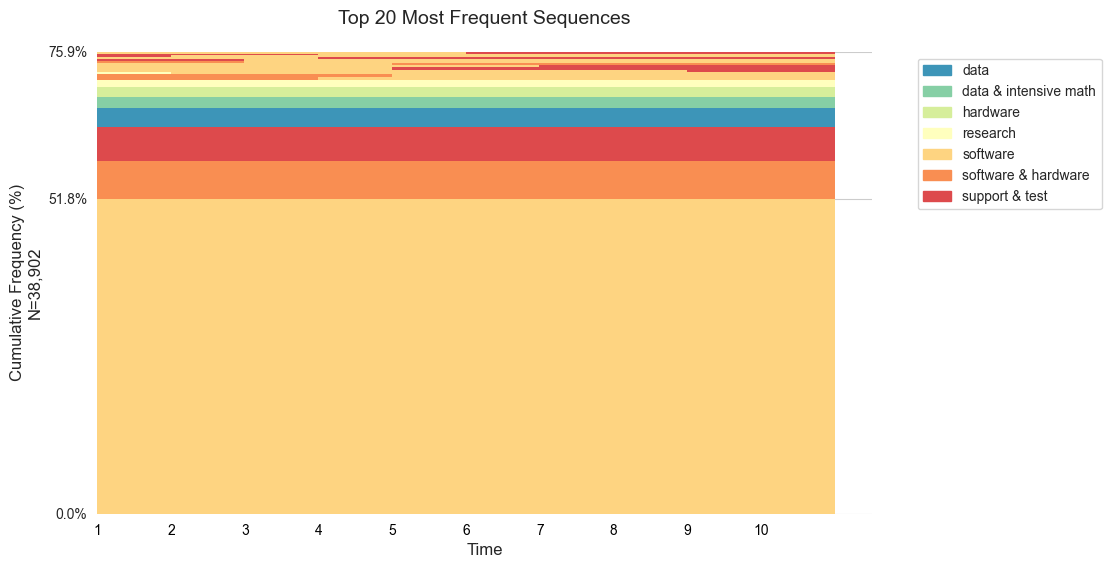

<Figure size 640x480 with 0 Axes>

In [12]:
# TODO: implement title, and xlabel and ylabel parameters.
# 而且你看跟index plot 的刻度不一样，对比起来就知道index plot做得更用心了

plot_most_frequent_sequences(detailed_data, 
                             top_n=20, 
                             save_as='top_20_most_frequent_sequences', dpi=300)